# Data Glacier - Week 02

### Import Libraries

In [1]:
# Pandas is necessary for array manipulation and calculation
import pandas as pd
from pandas import DataFrame

# Matplotlib library to create visualizations
import matplotlib.pyplot as plt

# Missingno used for missing data visualization
import missingno as msno

# NumPy necessary for statistical calculations
import numpy as np
np.set_printoptions(threshold=np.inf)

# Change theme of graphs
plt.style.use('fivethirtyeight')

# Export images from Jupyter to PDF
%matplotlib inline

# Import Seaborn to graph distplots and boxplots
import seaborn as sns

### Import Datasets

In [2]:
# Cleaned cab_data dataset
cab_df = pd.read_csv('C:/Users/Richard/Documents/GitHub/DataGlacier/Week 02/Datasets/cab_data_cleaned.csv')

### View Headers

In [3]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### Verify Data types

In [4]:
cab_df.dtypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

### Check for null values

In [5]:
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

### Remove Duplicates

In [6]:
cab_df = cab_df.drop_duplicates()

### Calculate five-number summary including interquartile range

In [7]:
cab_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


### Calculate Standard Deviation

In [8]:
cab_df.std()

Transaction ID    126805.803715
KM Travelled          12.233526
Price Charged        274.378911
Cost of Trip         157.993661
dtype: float64

### Calculate Mode

In [9]:
cab_df.mode(axis=0, numeric_only=False, dropna=True)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/5/2018,Yellow Cab,NEW YORK NY,33.6,191.27,362.88
1,10000012,NaN,NaN,NaN,NaN,298.32,NaN
2,10000013,NaN,NaN,NaN,NaN,NaN,NaN
3,10000014,NaN,NaN,NaN,NaN,NaN,NaN
4,10000015,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
359387,10440101,NaN,NaN,NaN,NaN,NaN,NaN
359388,10440104,NaN,NaN,NaN,NaN,NaN,NaN
359389,10440105,NaN,NaN,NaN,NaN,NaN,NaN
359390,10440106,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate Skewness

In [10]:
cab_df.skew()

Transaction ID    0.000072
KM Travelled      0.055779
Price Charged     0.873761
Cost of Trip      0.137958
dtype: float64

### Calculate Kurtosis

In [11]:
kurt = cab_df.kurt(axis=0)
print(kurt)

Transaction ID   -1.198925
KM Travelled     -1.126875
Price Charged     0.747635
Cost of Trip     -1.012233
dtype: float64


### Calculate Variance

In [12]:
np.var(cab_df, axis = 0)

Transaction ID    1.607967e+10
KM Travelled      1.496587e+02
Price Charged     7.528358e+04
Cost of Trip      2.496193e+04
dtype: float64

### Drop object variables from calculations

In [13]:
cab_df_int = cab_df.drop(['Date of Travel', 'Company', 'City'], axis=1)

In [14]:
cab_df_int.dtypes

Transaction ID      int64
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

### Calculate Median

In [15]:
median_array = np.median(cab_df_int, axis=0)
print(median_array)

[1.02210355e+07 2.24400000e+01 3.86360000e+02 2.82480000e+02]


### Calculate Frequency Bins

array([[<AxesSubplot:title={'center':'KM Travelled'}>]], dtype=object)

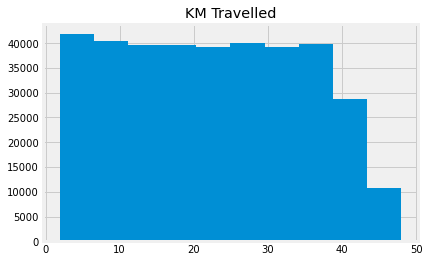

In [16]:
cab_df[['KM Travelled']].hist()

### Create Univariate Distribution Plots

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


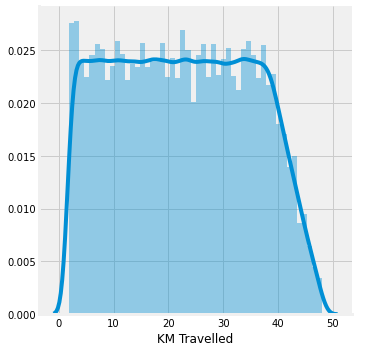

In [17]:
sns.FacetGrid(cab_df,height=5).map(sns.distplot,"KM Travelled").add_legend()

### Boxplots

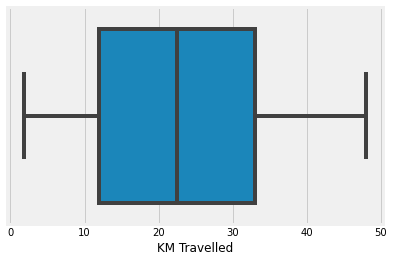

In [18]:
sns.boxplot(x="KM Travelled",data=cab_df)
plt.show()